<a href="https://colab.research.google.com/github/chaobai/Cousera-DeepLearning.AI-TensorFlow-Developer/blob/master/C3%20-%20Natural%20Language%20Processing/W4/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [18]:
#!pip install tensorflow==2.5.0

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 
import tensorflow as tf

In [20]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 34.6MB/s]


In [25]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
### END CODE HERE
    
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 10, 100)           321100    
                                                                 
 bidirectional_18 (Bidirecti  (None, 10, 300)          301200    
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 10, 300)           0         
                                                                 
 bidirectional_19 (Bidirecti  (None, 200)              320800    
 onal)                                                           
                                                                 
 dense_14 (Dense)            (None, 1605)              322605    
                                                                 
 dense_15 (Dense)            (None, 3211)            

In [26]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 10s 11ms/step - loss: 6.9824 - accuracy: 0.0218
Epoch 2/100
484/484 [==============================] - 5s 11ms/step - loss: 6.5041 - accuracy: 0.0237
Epoch 3/100
484/484 [==============================] - 5s 10ms/step - loss: 6.4064 - accuracy: 0.0252
Epoch 4/100
484/484 [==============================] - 5s 10ms/step - loss: 6.2790 - accuracy: 0.0310
Epoch 5/100
484/484 [==============================] - 5s 10ms/step - loss: 6.1717 - accuracy: 0.0367
Epoch 6/100
484/484 [==============================] - 5s 10ms/step - loss: 6.0784 - accuracy: 0.0408
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 5.9860 - accuracy: 0.0406
Epoch 8/100
484/484 [==============================] - 5s 11ms/step - loss: 5.8797 - accuracy: 0.0457
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 5.7564 - accuracy: 0.0539
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 5.63

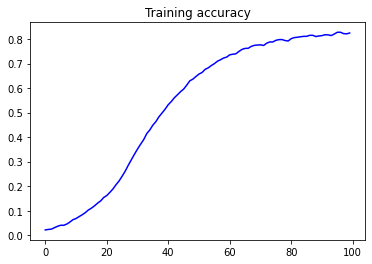

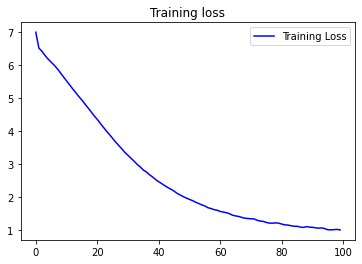

In [27]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [36]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	predicted_class = np.argmax(predicted, axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted_class:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope away the way days torn slain ' alone did chide too green me ' alone live alone alone alone write his ill short days were lie with their ' or die alone alone alone live before behold alone live doth thee thy state to thee alone grows alone before behold behold alone knowing thine ' no wrong old kill'd faith prove ' aside go strong lie to die to thee behold alone may be alone so behold to thine be such thy blind eyes still still be away all thee alone live grace beauty's thee so swear or me to
